In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("shib.csv")

In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
624,2022-04-17,0.001956,0.001987,0.001882,0.001886,0.001886,32123324058
625,2022-04-18,0.001887,0.001931,0.001816,0.001926,0.001926,54398409553
626,2022-04-19,0.001927,0.001955,0.001903,0.001944,0.001944,39313403617
627,2022-04-20,0.001944,0.001968,0.001883,0.001894,0.001894,47963513217
628,2022-04-21,0.001895,0.001932,0.001888,0.001913,0.001913,37176508416


In [4]:
#Some Description of data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       629 non-null    object 
 1   Open       629 non-null    float64
 2   High       629 non-null    float64
 3   Low        629 non-null    float64
 4   Close      629 non-null    float64
 5   Adj Close  629 non-null    float64
 6   Volume     629 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.5+ KB


,Open,High,Low,Close,Adj Close,Volume
count,629.000000,629.000000,629.000000,629.000000,629.000000,6.290000e+02
mean,0.000923,0.000989,0.000865,0.000926,0.000926,8.453815e+10
std,0.001173,0.001261,0.001088,0.001173,0.001173,2.214552e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.730300e+05
50%,0.000501,0.000526,0.000480,0.000503,0.000503,2.291150e+10
75%,0.001842,0.001922,0.001749,0.001851,0.001851,7.830548e+10
max,0.005946,0.006636,0.004980,0.006003,0.006003,2.930521e+12


In [5]:
#Checking the Volatility of Closing Price
df["Close"].describe()

count    629.000000
mean       0.000926
std        0.001173
min        0.000000
25%        0.000000
50%        0.000503
75%        0.001851
max        0.006003
Name: Close, dtype: float64

In [6]:
#Converting DAte IN datatime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       629 non-null    datetime64[ns]
 1   Open       629 non-null    float64       
 2   High       629 non-null    float64       
 3   Low        629 non-null    float64       
 4   Close      629 non-null    float64       
 5   Adj Close  629 non-null    float64       
 6   Volume     629 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.5 KB


## FEATURE MANIPULATION 

In [7]:
df.columns
df["Gap"] = df["High"] -df["Low"]
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Gap
0,2020-08-01,0.0,0.0,0.0,0.0,0.0,120246648,0.0
1,2020-08-02,0.0,0.0,0.0,0.0,0.0,14466490,0.0
2,2020-08-03,0.0,0.0,0.0,0.0,0.0,9713284,0.0
3,2020-08-04,0.0,0.0,0.0,0.0,0.0,1479998,0.0
4,2020-08-05,0.0,0.0,0.0,0.0,0.0,2009723,0.0


## Descriptive Vizualisation / Analysis
it summarizes and organizes all of the collected data into something manageable and simple to understand. The descriptions can include the entire data set or just a part of the data set.

One of the most important things to know about descriptive data analysis is that it focuses on the data instead of on the implication that can be far reaching and go beyond the represented data.

This is the main difference between inferential statistics and descriptive statistics. Inferential statistics uses complicated calculations to make predictions while descriptive statistics doesn’t.

<AxesSubplot:xlabel='Date'>

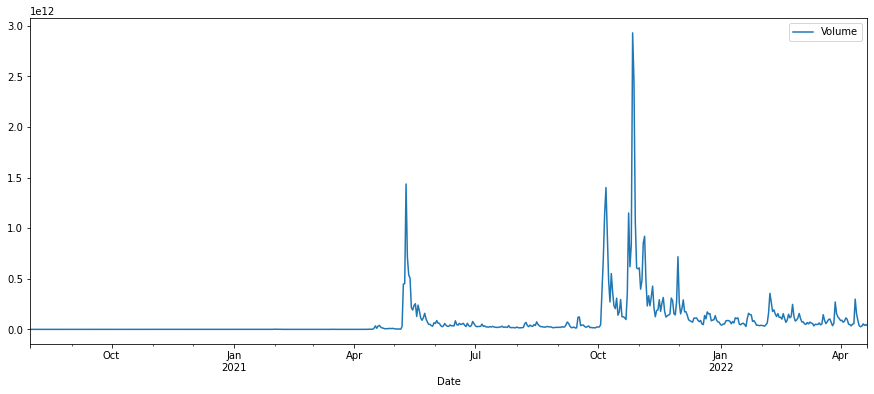

In [8]:
df.plot("Date" , "Volume" , figsize = (15,6))

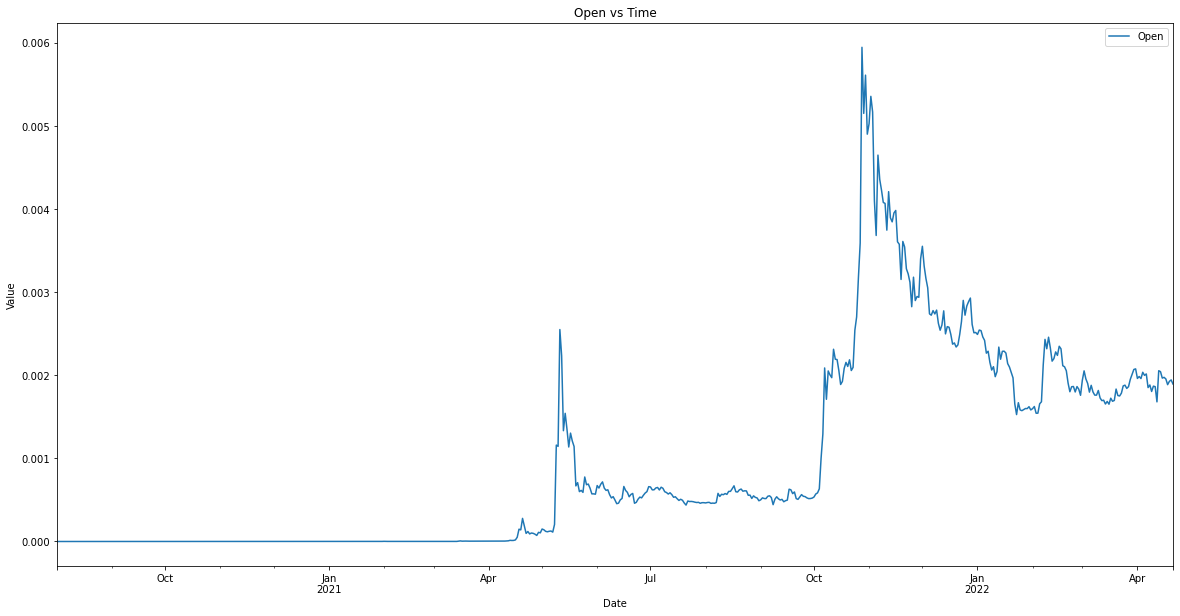

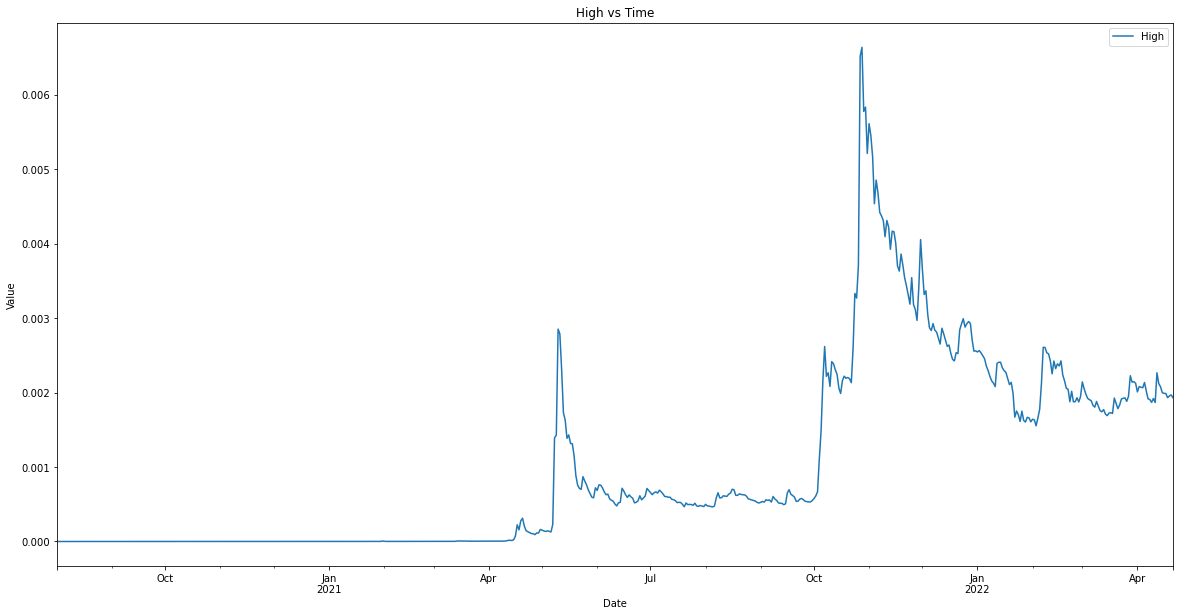

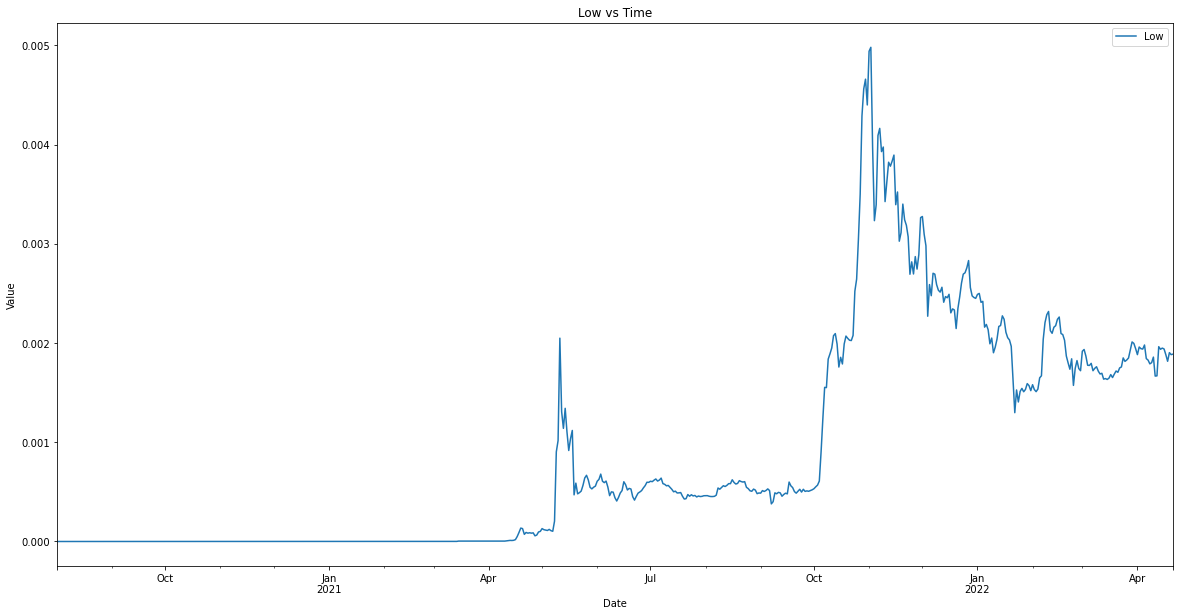

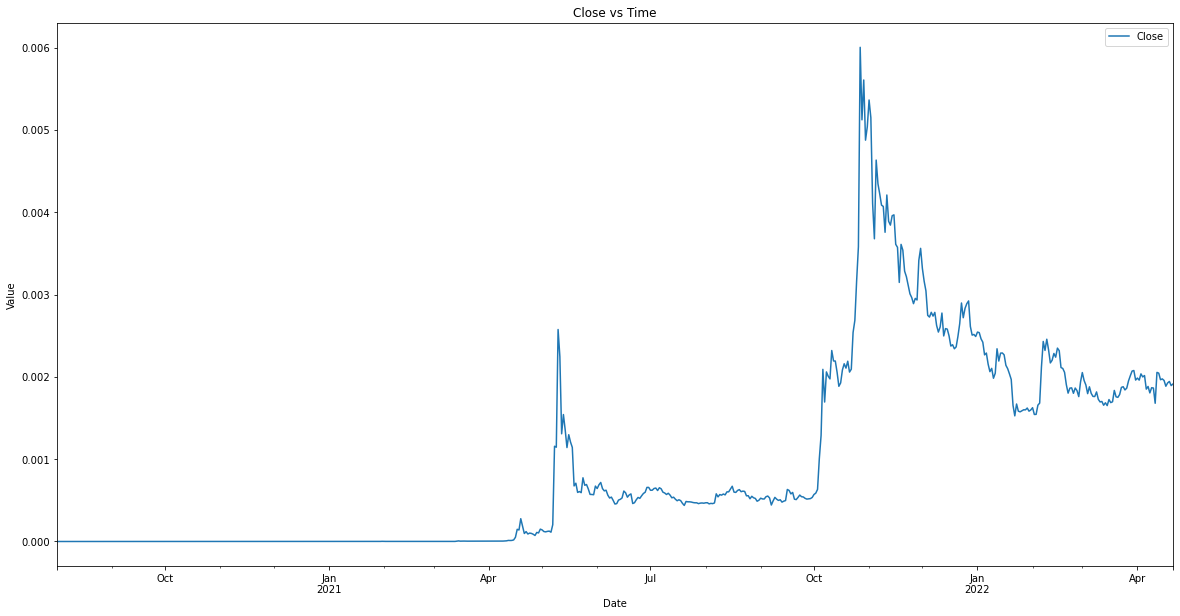

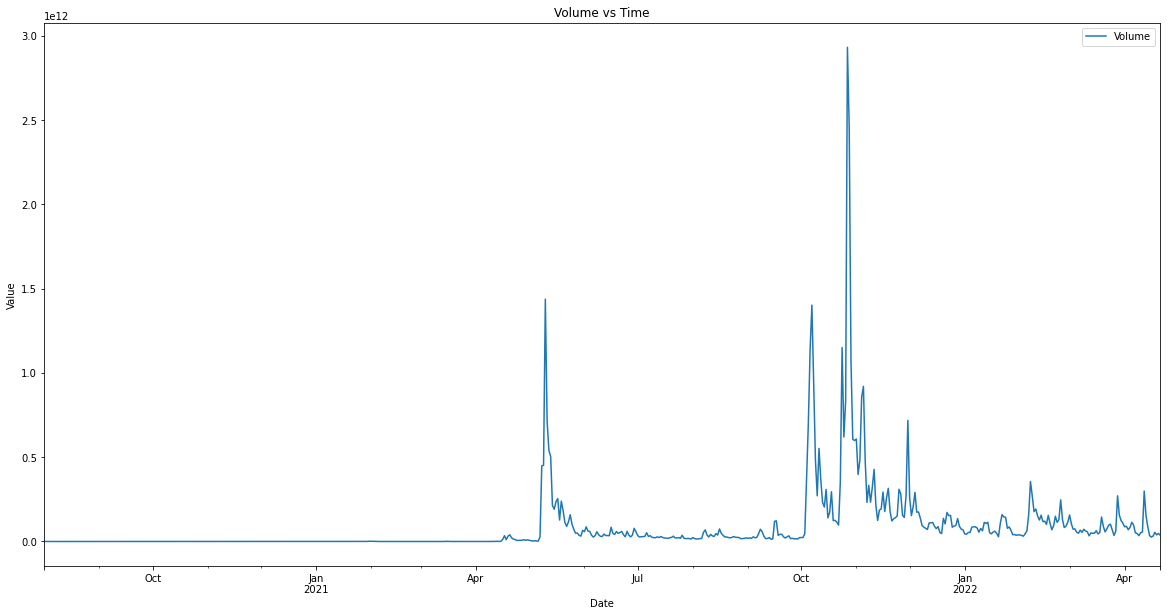

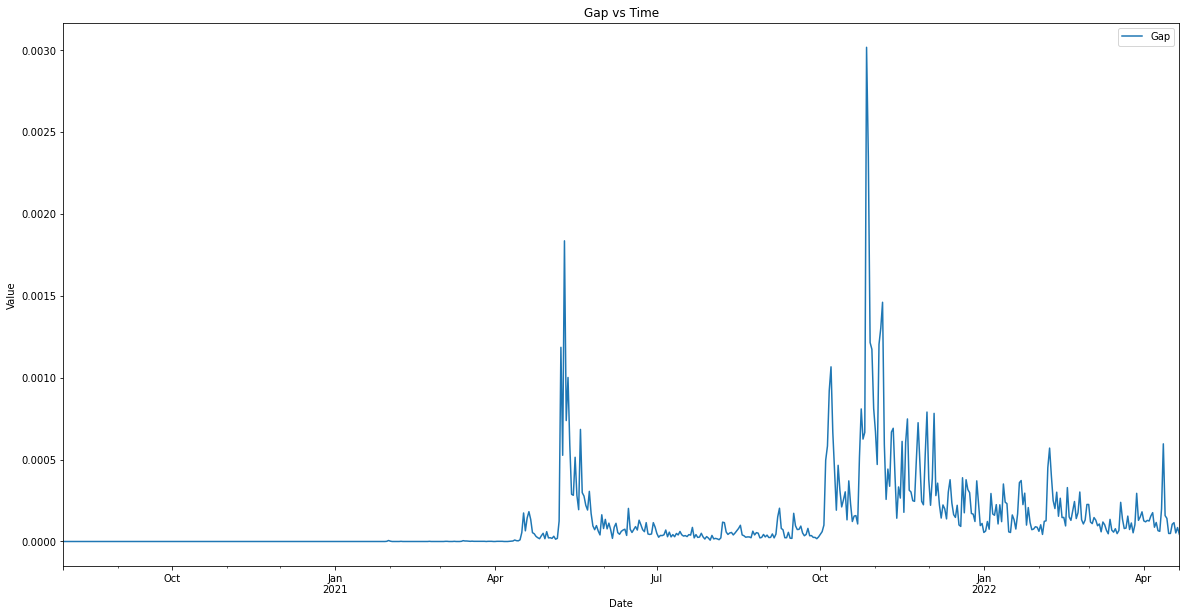

In [9]:
## Comparing Every Feature wrt time
# %matplotlib inline
features =   ["Open", "High", "Low", "Close" , "Volume" , "Gap"]
Title =  ["Open" , "High " , "Low" , "Close" , "Volume", "Gap"]
for feature  in features :
    df.plot(x = "Date", y = feature, title = feature+" vs Time" , xlabel = "Date", ylabel = "Value", figsize = (20,10))

## OBSERVATION1 - The historical trend of Shiba inu before April2021 is kind of constant and quite dead in case of growth
The very first big jump was from mid May and it sustained till October 
On mid October the Shiba Inu has seen highest growth of apprpx 0.006 

# CALCULATING MOVING AVERAGE
Source : https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
Moving Average is calculating the average of data over a period of time. The moving average is also known as the rolling mean and is calculated by averaging data of the time series within k periods of time. 

## WHY?
A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the noise from random short-term price fluctuations.
The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.

## MOVING AVERAGE AS PREDICTIVE ANALYSIS
The concept of a moving average is straightforward. You generally apply a moving average to a series of observations taken over time. The average moves forward with the data series. So, the first moving average might include Days 1 through 3, the second moving average might include Days 2 through 4, and so on. This chapter discusses some of the reasons why you might want to make those calculations.
It is the first step towards the predictive/Inferential Analysis

## METHODS:
for this particular anlysis I am using :
1 . Simple Moving Average (SMA)
2 . Exponential Moving Average (EMA)
3. Cumulative Moving Average(CMA)


## 1. SIMPLE MOVING AVERAGE


In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Gap
0,2020-08-01,0.0,0.0,0.0,0.0,0.0,120246648,0.0
1,2020-08-02,0.0,0.0,0.0,0.0,0.0,14466490,0.0
2,2020-08-03,0.0,0.0,0.0,0.0,0.0,9713284,0.0
3,2020-08-04,0.0,0.0,0.0,0.0,0.0,1479998,0.0
4,2020-08-05,0.0,0.0,0.0,0.0,0.0,2009723,0.0


In [11]:
df["SMA21"] = df['Close'].rolling(21).mean() #USING 21 days as window
df.dropna(inplace=True)

<AxesSubplot:title={'center':'Simple Moving Average (Closing Price)'}, xlabel='Date', ylabel='Value'>

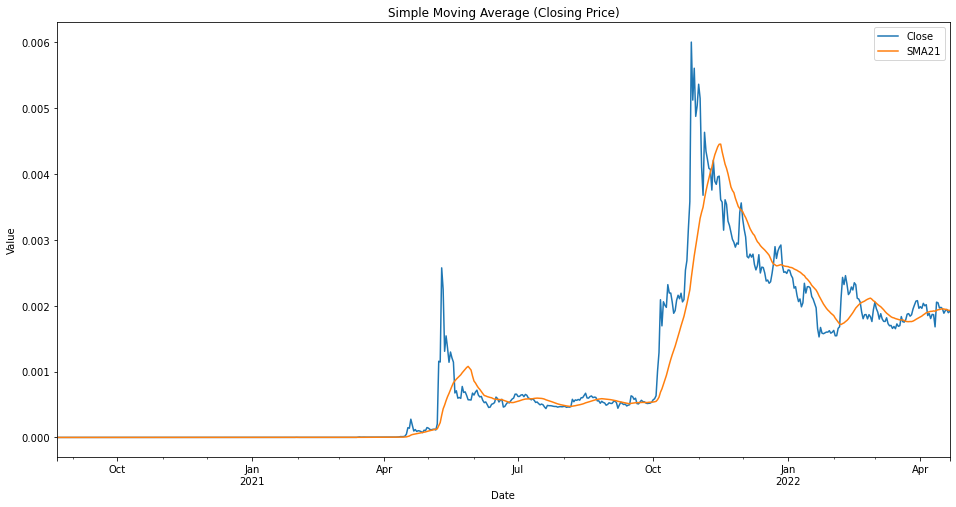

In [15]:

# plotting Close price and simple
# moving average of 21 days using .plot() method
df.plot(x = "Date", y = ["Close" , "SMA21"] , xlabel = "Date", ylabel = "Value",title = "Simple Moving Average (Closing Price)", figsize = (16,8))

## 2. Exponential Moving Average (EMA)

<AxesSubplot:title={'center':'Exponential Moving Average (Closing Price)'}, xlabel='Date', ylabel='Value'>

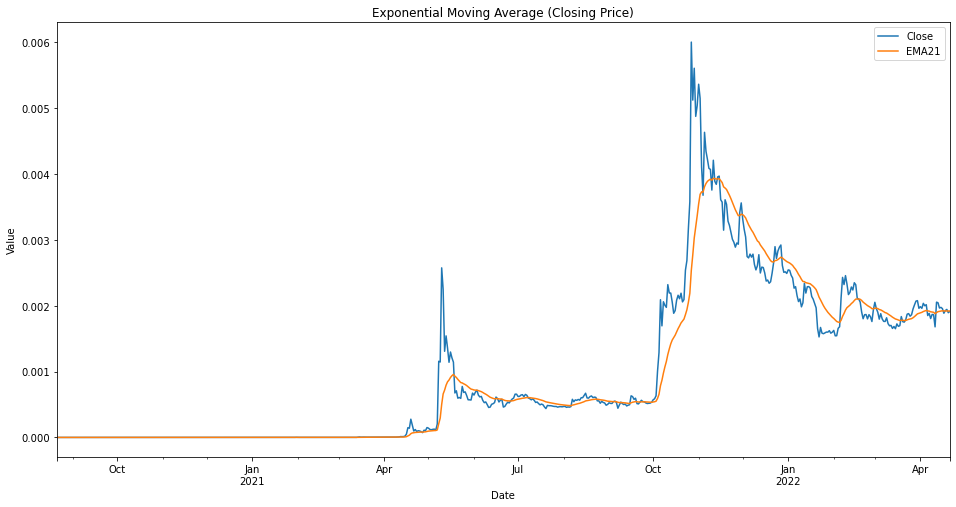

In [13]:
df["EMA21"]  = df['Close'].ewm(span=21).mean()
df.plot(x = "Date", y = ["Close" , "EMA21"] , xlabel = "Date", ylabel = "Value",title = "Exponential Moving Average (Closing Price)", figsize = (16,8))

## Cumulative Moving Average

<AxesSubplot:title={'center':'Cummulative Moving Average (Closing Price)'}, xlabel='Date', ylabel='Value'>

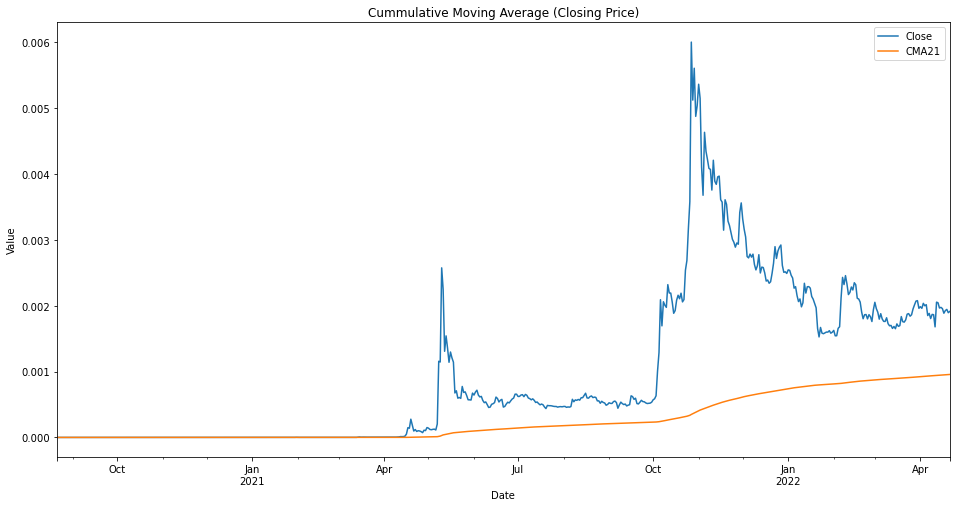

In [14]:
df["CMA21"] =  df["Close"].expanding().mean()
df.plot(x = "Date", y = ["Close" , "CMA21"] , xlabel = "Date", ylabel = "Value", title = "Cummulative Moving Average (Closing Price)",figsize = (16,8))

## OBSERVATION - 2  (As moving Average is Plotted so this smoothens out the noise based on mean we can clearly see it as a "Trend  Spotting" tool and after May the trend is upward .
it can signal that a shiba is in an uptrend. Conversely, when a moving average is falling, it can shiba that a stock is in a downtrend.


## CORRELATION ANALYSIS
